In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import re
import numpy as np

# Data load

In [2]:
root = Path('/tmp/working/data/rewp_batch1')
fn_pattern = r'rewp_(hc|mdd)_(\d{4})_(gain|loss).csv'
type_map1 = {
    'hc': 1,  # health control
    'mdd': 0  # depressed
}
type_map2 = {
    'gain': 1,
    'loss': 0
}
keys = list()  # to build multi-index
dfs = list()  # a list of dataframes to be concatenated to final dataframes
shapes = list()  # keep a record of the shapes of all loaded data files

for f in root.iterdir():
    name = f.name
    m = re.match(fn_pattern, name)
    if m is None:
        print('File not matching pattern: {}'.format(name))
        continue
    code = m.group(2)
    health = type_map1[m.group(1)] 
    type_ = type_map2[m.group(3)]
    keys.append((health, type_, code))
    df = pd.read_csv(f, delim_whitespace=False).T  # read a single csv file into a dataframe
    df.index.set_names(['channel'], inplace=True)  # give a name to the index
    dfs.append(df)
    shapes.append(df.shape)

# Concatenate individual data frames into a big one, so it will be easier to work with in the future
df = pd.concat(dfs, keys=keys, names=['healthy', 'positive/neutral', 'id'])
df.head()

File not matching pattern: .ipynb_checkpoints


0        1        2        3     \
healthy positive/neutral id   channel                                       
0       1                2000 CP1      0.50540  0.54920  0.58935  0.62350   
                              CP2      2.56620  2.58800  2.60485  2.61480   
                              Cz      -0.13485 -0.11055 -0.09045 -0.07700   
                              FC1     -1.68945 -1.70740 -1.72425 -1.74290   
                              FC2     -1.27340 -1.27600 -1.27975 -1.28675   

                                          4        5        6        7     \
healthy positive/neutral id   channel                                       
0       1                2000 CP1      0.65205  0.67700  0.70040  0.72405   
                              CP2      2.61790  2.61610  2.61105  2.60390   
                              Cz      -0.06995 -0.06705 -0.06590 -0.06485   
                              FC1     -1.76335 -1.78295 -1.79870 -1.80780   
                              FC2     -1.29550 -1.30145 -1.29960 -1.28545   

                                          8        9     ...     1490  \
healthy positive/neutral id   channel                    ...            
0       1                2000 CP1      0.74960  0.77900  ...  5.77970   
                              CP2      2.59640  2.59115  ...  6.59915   
                              Cz      -0.06190 -0.05490  ...  4.53490   
                              FC1     -1.80725 -1.79450  ...  2.67250   
                              FC2     -1.25435 -1.20220  ...  2.25150   

                                          1491     1492     1493     1494  \
healthy positive/neutral id   channel                                       
0       1                2000 CP1      5.90280  6.01095  6.10120  6.16890   
                              CP2      6.66730  6.72255  6.76365  6.78745   
                              Cz       4.61610  4.68790  4.74845  4.79355   
                              FC1      2.75065  2.81545  2.86560  2.89805   
                              FC2      2.31660  2.36485  2.39550  2.40735   

                                          1495     1496     1497     1498  \
healthy positive/neutral id   channel                                       
0       1                2000 CP1      6.21185  6.22610  6.21445  6.17260   
                              CP2      6.79450  6.78290  6.75645  6.71175   
                              Cz       4.82225  4.83080  4.82180  4.78995   
                              FC1      2.91330  2.90925  2.88975  2.85160   
                              FC2      2.40120  2.37700  2.34090  2.29230   

                                          1499  
healthy positive/neutral id   channel           
0       1                2000 CP1      6.10255  
                              CP2      6.65040  
                              Cz       4.73605  
                              FC1      2.79750  
                              FC2      2.23570  

[5 rows x 1500 columns]

Data frame shape: (520, 1500)
Total files loaded: 40


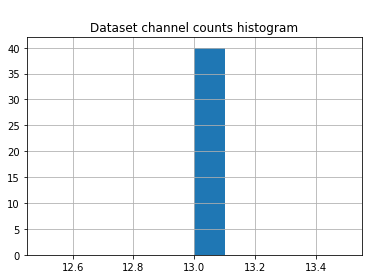

In [3]:
# Print some statistics
print('Data frame shape: {}'.format(df.shape))
print('Total files loaded: {}'.format(len(dfs)))

# Each csv file carries various amount of channels, check the channel statistics
chl_counts = [c for c, _ in shapes]
chl_counts = pd.Series(chl_counts)
plt.title('\nDataset channel counts histogram')
chl_counts.hist()

In [4]:
# save the data
save_path = Path('/tmp/working/data/processed/rewp_step_1_load.pkl')
pickle.dump(df, save_path.open('wb'))

# Data explore

In [5]:
ids = df.index.levels[2]  # find all ids
print('Total of {} participants'.format(len(ids)))
print('{} Healthy control'.format(len([i for i in ids if int(i) < 2000])))
print('{} MDD'.format(len([i for i in ids if int(i) >= 2000])))
print('All participant IDs:')
print(' '.join(map(str, ids)))

Total of 20 participants
10 Healthy control
10 MDD
All participant IDs:
1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


Text(0.5, 1.0, 'One MDD patient, Cz channel')

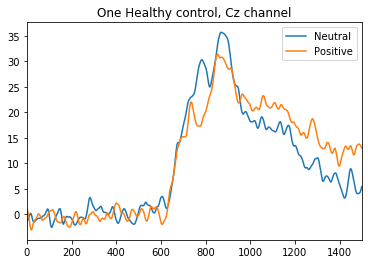

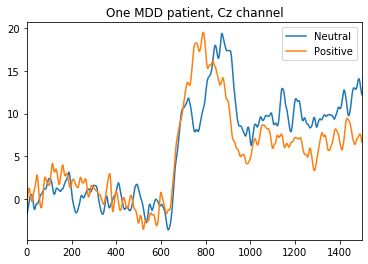

In [6]:
df.loc[(slice(None), slice(None), '1003', 'Cz'), :].T.plot()
plt.legend(['Neutral', 'Positive'])
plt.title('One Healthy control, Cz channel')
df.loc[(slice(None), slice(None), '2003', 'Cz'), :].T.plot()
plt.legend(['Neutral', 'Positive'])
plt.title('One MDD patient, Cz channel')

Text(0.5, 1.0, 'All healthy control positive Cz channel')

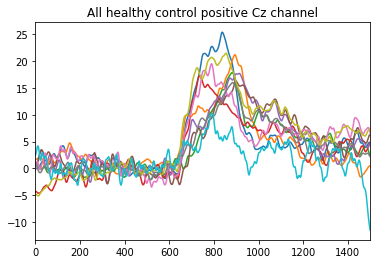

In [7]:
df.loc[(0, 1, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All healthy control positive Cz channel')

Text(0.5, 1.0, 'All healthy control neutral Cz channel')

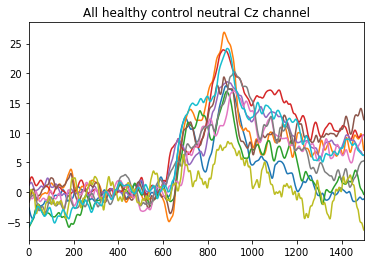

In [8]:
df.loc[(0, 0, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All healthy control neutral Cz channel')

Text(0.5, 1.0, 'All MDD patients positive Cz channel')

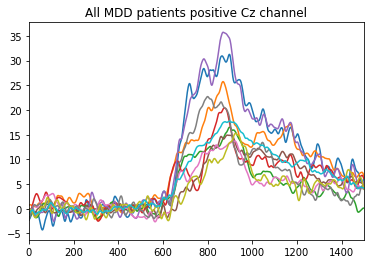

In [9]:
df.loc[(1, 1, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All MDD patients positive Cz channel')

Text(0.5, 1.0, 'All MDD patients neutral Cz channel')

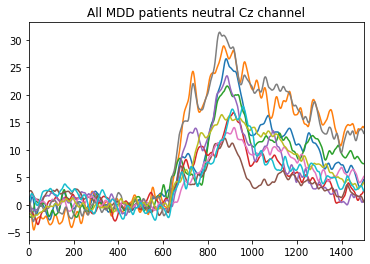

In [10]:
df.loc[(1, 0, slice(None), 'Cz'), :].T.plot(legend=None)
plt.title('All MDD patients neutral Cz channel')

In [11]:
print('The count of missing values: {}'.format(
    df.isnull().values.sum()
))

The count of missing values: 0


In [12]:
all_channels = set(df.index.levels[3])
incomplete_channels = set()
print('All channels:', ' '.join(sorted(list(all_channels))))
for sid in df.index.levels[2]:
    sub_df = df.xs(sid, level=2)
    channels = set(sub_df.reset_index(level=2)['channel'])
    missing = all_channels - channels
    incomplete_channels = incomplete_channels | missing
print('Channels without missing data:', ' '.join(sorted(list(all_channels - incomplete_channels))))
print('Channels with missing data:', ' '.join(sorted(list(incomplete_channels))))

All channels: CP1 CP2 Cz FC1 FC2 FCz Fp1 Fp2 Fz O1 O2 Oz Pz
Channels without missing data: CP1 CP2 Cz FC1 FC2 FCz Fp1 Fp2 Fz O1 O2 Oz Pz
Channels with missing data: 
